In [ ]:
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

In [ ]:
data1 = pd.read_csv('customercare.csv')

In [ ]:
data1['dup'] = data1.duplicated(subset=None, keep='first')
data1 = data1[data1['dup'] == False]
del data1['dup']

In [ ]:
data1['positive_review'] = data1[data1.columns[3:4]].apply(
    lambda x: ' '.join(x.dropna().astype(str)),
    axis=1
)
data1['negative_review'] = data1[data1.columns[4:5]].apply(
    lambda x: ' '.join(x.dropna().astype(str)),
    axis=1
)

In [ ]:
data1.head()

,Timestamp,Membership ID,Phone No.,Which of our service did you like the most,Which of our service did you dislike the most,Are you satisfied with our service,"If no, let us know what should we need to improve",Unnamed: 7,positive_review,negative_review
0,2021/02/08 11:02:57 PM GMT+5:30,18BCS4064,9456688945,Multiple discount available;Products are well ...,Less products available,Yes,Nil,Platinum,Multiple discount available;Products are well ...,Less products available
1,2021/02/09 4:25:21 PM GMT+5:30,18BCS4044,8903492846,Discounted express delivery for platinum,Late delivery,Yes,I'm satisfied with your service,Platinum,Discounted express delivery for platinum,Late delivery
2,2021/02/09 4:25:58 PM GMT+5:30,18BCS4064,93626 52204,Multiple discount available,Less products available,Yes,More number of products needed,Platinum,Multiple discount available,Less products available
3,2021/02/09 4:26:17 PM GMT+5:30,1002,9629088349,Quality and quantity,Late delivery,Yes,Try to deliver products on time,Platinum,Quality and quantity,Late delivery
4,2021/02/09 4:31:47 PM GMT+5:30,18BCS4039,9626738771,Quality and quantity,Need more discount,Yes,Nothing,Gold,Quality and quantity,Need more discount


In [ ]:
data1.iloc[0]

Timestamp                                                              2021/02/08 11:02:57 PM GMT+5:30
Membership ID                                                                               18BCS4064 
Phone No.                                                                                   9456688945
Which of our service did you like the most           Multiple discount available;Products are well ...
Which of our service did you dislike the most                                  Less products available
Are you satisfied with our service                                                                 Yes
If no, let us know what should we need to improve                                                  Nil
Unnamed: 7                                                                                    Platinum
positive_review                                      Multiple discount available;Products are well ...
negative_review                                                          

In [ ]:
cols = [0,2,3,4,5,6,7] 

In [ ]:
import re
from nltk.stem import WordNetLemmatizer, PorterStemmer, SnowballStemmer
stop_words_file = 'SmartStoplist.txt'

stop_words = []

with open(stop_words_file, "r") as f:
    for line in f:
        stop_words.extend(line.split()) 
        
stop_words = stop_words  

def preprocess(raw_text):
    
    letters_only_text = re.sub("[^a-zA-Z]", " ", raw_text)
    words = letters_only_text.lower().split()
    cleaned_words = []
    lemmatizer = PorterStemmer() 
    for word in words:
        if word not in stop_words:
            cleaned_words.append(word)
    
    stemmed_words = []
    for word in cleaned_words:
        word = lemmatizer.stem(word)  
        stemmed_words.append(word)
    return " ".join(stemmed_words)

In [ ]:
data1['positive_review'] = data1['positive_review'].apply(preprocess)
data1['negative_review'] = data1['negative_review'].apply(preprocess)

data1.head()

,Timestamp,Membership ID,Phone No.,Which of our service did you like the most,Which of our service did you dislike the most,Are you satisfied with our service,"If no, let us know what should we need to improve",Unnamed: 7,positive_review,negative_review
0,2021/02/08 11:02:57 PM GMT+5:30,18BCS4064,9456688945,Multiple discount available;Products are well ...,Less products available,Yes,Nil,Platinum,multipl discount avail product well pack quali...,less product avail
1,2021/02/09 4:25:21 PM GMT+5:30,18BCS4044,8903492846,Discounted express delivery for platinum,Late delivery,Yes,I'm satisfied with your service,Platinum,discount express deliveri platinum,late deliveri
2,2021/02/09 4:25:58 PM GMT+5:30,18BCS4064,93626 52204,Multiple discount available,Less products available,Yes,More number of products needed,Platinum,multipl discount avail,less product avail
3,2021/02/09 4:26:17 PM GMT+5:30,1002,9629088349,Quality and quantity,Late delivery,Yes,Try to deliver products on time,Platinum,qualiti quantiti,late deliveri
4,2021/02/09 4:31:47 PM GMT+5:30,18BCS4039,9626738771,Quality and quantity,Need more discount,Yes,Nothing,Gold,qualiti quantiti,discount


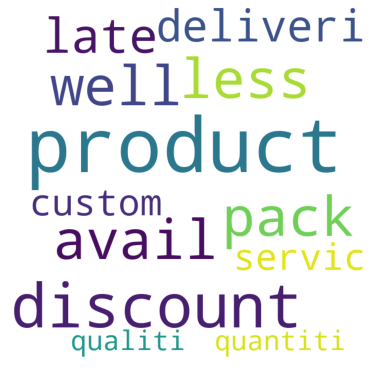

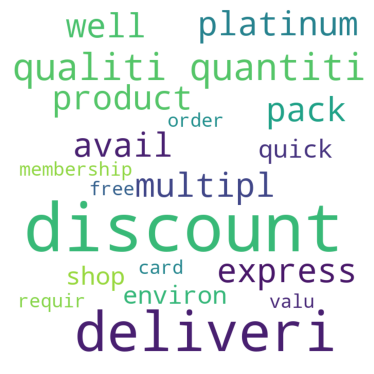

In [ ]:
from wordcloud import WordCloud

import matplotlib.pyplot as plt
# if uising a Jupyter notebook, include:
%matplotlib inline



for review_col in ['negative_review', 'positive_review']:
    all_words = '' 
    for arg in data1[review_col]: 
        tokens = arg.split()  
        all_words += " ".join(tokens)+" "

    wordcloud = WordCloud(width = 700, height = 700, 
                    background_color ='white', 
                    min_font_size = 10).generate(all_words) 
                         
    plt.figure(figsize = (5, 5), facecolor = None) 
    plt.imshow(wordcloud)
    plt.axis("off") 
    plt.tight_layout(pad = 0) 
    plt.show()